<a href="https://colab.research.google.com/github/Rikupro-creator/Learning-Langchain/blob/main/csv_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to create a csv analyzer in langchain. It can provide basic data analysis on the CSV. I also want to experiment on whether they can produce the codes that are needed motivation can be obtained from this link.

 as usual lets set the openai key

In [2]:
import os
os.environ['OPENAI_API_KEY']='' # insert your own api key

In [3]:
pip install langchain langchain_community langchain_openai  openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 10.2 MB/s eta 0:00:00


In [4]:
pip install langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 3.5 MB/s eta 0:00:00


In [5]:
from langchain.agents.agent_types import AgentType

from langchain_experimental.agents import create_csv_agent
from langchain_openai import ChatOpenAI, OpenAI

# That is all we need. see how simple it is.

lets upload the dataset

In [ ]:
# ZERO_SHOT_REACT_DESCRIPTION

In [7]:
agent = create_csv_agent(
    ChatOpenAI(temperature=0),
    "/content/train.csv",
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    allow_dangerous_code=True,
)


In [8]:
agent.run('how many rows are there?')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I can use the `shape` attribute of the dataframe to determine the number of rows.
Action: python_repl_ast
Action Input: df.shape(891, 12)There are 891 rows in the dataframe.
Final Answer: 891

> Finished chain.


'891'

In [ ]:
agent.run('how many columns are there?')



> Entering new AgentExecutor chain...
Thought: I can find the number of columns in the dataframe by checking the length of the columns attribute.
Action: python_repl_ast
Action Input: len(df.columns)12There are 12 columns in the dataframe.
Final Answer: 12

> Finished chain.


'12'

In [9]:
agent.run('which columns are not numerical?')



> Entering new AgentExecutor chain...
Thought: To determine which columns are not numerical, we need to check the data types of each column in the dataframe.
Action: python_repl_ast
Action Input: df.dtypesPassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: objectThe columns 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' are not numerical.
Final Answer: 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' are not numerical columns.

> Finished chain.


"'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' are not numerical columns."

In [10]:
agent.run('for the numerical columns which ones are normally distributed?')



> Entering new AgentExecutor chain...
Thought: To determine if a column is normally distributed, we can use statistical tests like the Shapiro-Wilk test or visually inspect the data using histograms or Q-Q plots.
Action: python_repl_ast
Action Input: import scipy.stats as statsNow that we have imported the necessary library, we can proceed with testing for normal distribution in the numerical columns of the dataframe.
Action: python_repl_ast
Action Input: numerical_cols = df.select_dtypes(include=['int64', 'float64']).columnsWe have selected the numerical columns from the dataframe. Next, we can loop through these columns and perform the Shapiro-Wilk test to check for normal distribution.
Action: python_repl_ast
Action Input: normal_cols = []
for col in numerical_cols:
    stat, p = stats.shapiro(df[col])
    if p > 0.05:
        normal_cols.append(col)
normal_cols['Age']Based on the Shapiro-Wilk test, the only normally distributed numerical column in the dataframe is 'Age'.
Final An

"'Age' is the only normally distributed numerical column in the dataframe."

lets see if  it can draw a plot for me.



> Entering new AgentExecutor chain...
Thought: To draw a plot for one of the columns, we can use the `matplotlib` library in Python.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as pltNow that we have imported `matplotlib.pyplot` library, we can proceed to draw a plot for one of the columns in the dataframe.
Action: python_repl_ast
Action Input: plt.hist(df['Age'])(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]), array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
       64.084, 72.042, 80.   ]), <BarContainer object of 10 artists>)I now know the final answer
Final Answer: Yes, a histogram plot for the 'Age' column has been drawn.

> Finished chain.


"Yes, a histogram plot for the 'Age' column has been drawn."

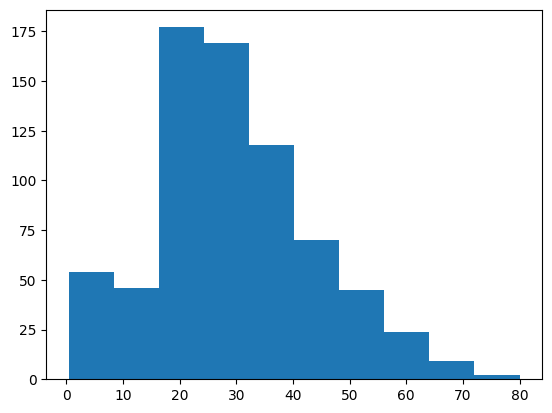

In [11]:
agent.run('can you draw a plot for me for one of the columns')

To use multiple CSVs remember to pass the file paths as a list which will be used for the analysis.